<a href="https://colab.research.google.com/github/awenroberts/QM2-Project/blob/main/COPY_asylum_seekers_receiving_support_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount google drive in colab

In [ ]:
import os
import pandas as pd

#df = pd.read_excel(
  #  "/content/drive/MyDrive/Prifysgol_UCL/2nd Year Modules/1 QM II/QM II PROJECT/Copy support-local-authority-datasets-sep-2025.xlsx",
  #  sheet_name="Data_Asy_D11_2020_2025",
  #  engine="openpyxl"
#)

df = pd.read_excel(
    "/content/Copy support-local-authority-datasets-sep-2025.xlsx",
    sheet_name="Data_Asy_D11",
    header=1,
    engine="openpyxl"
)
df.head()

,Date (as at…),Quarter,Year-Quarter,Support Type,UK Region / Nation,Local Authority,LAD Code,Accommodation Type,People
0,2014-03-31,Q1,2014 Q1,Section 4,N/A - Section 4 (pre-2018),N/A - Section 4 (pre-2018),N/A - Section 4 (pre-2018),Dispersal Accommodation,4854
1,2014-03-31,Q1,2014 Q1,Section 95,East Midlands,Amber Valley,E07000032,Subsistence Only,1
2,2014-03-31,Q1,2014 Q1,Section 95,East Midlands,Bassetlaw,E07000171,Subsistence Only,4
3,2014-03-31,Q1,2014 Q1,Section 95,East Midlands,Blaby,E07000129,Subsistence Only,1
4,2014-03-31,Q1,2014 Q1,Section 95,East Midlands,Broxtowe,E07000172,Dispersal Accommodation,7


In [ ]:
#check the data types
df.dtypes

,0
Date (as at…),datetime64[ns]
Quarter,object
Year-Quarter,object
Support Type,object
UK Region / Nation,object
Local Authority,object
LAD Code,object
Accommodation Type,object
People,int64


In [ ]:
#change the data types accordingly so we can work with the data usign pandas
df['Quarter']=df['Quarter'].astype('category')
df['Local Authority']=df['Local Authority'].astype('category')
df['UK Region / Nation']=df['UK Region / Nation'].astype('category')
df['LAD Code']=df['LAD Code'].astype('string')
df['Accommodation Type']=df['Accommodation Type'].astype('category')
df['People']=df['People'].astype('int64')

In [ ]:
#rename the columns to make things easier later
df = df.rename(columns={
    "Date (as at…)": "date",
    "Quarter": "quarter",
    "Year-Quarter": "year_quarter",
    "Support Type": "support_type",
    "UK Region / Nation": "region",
    "Local Authority": "local_authority",
    "LAD Code": "lad_code",
    "Accommodation Type": "accommodation_type",
    "People": "people"
})

In [ ]:
#convert the date column
df["date"] = pd.to_datetime(df["date"], errors="coerce")

#check it worked
df["date"].min(), df["date"].max()

#create proper quarterly time variable
df["year_quarter"] = df["date"].dt.to_period("Q")

In [ ]:
#accommodation_map = {
    # Subsistence-only variants
    "Subsistence Only": "Subsistence Only",
    "Subsistence only": "Subsistence Only",
    "N/A - Section 98 (pre-2023)": "Subsistence Only",

    # Initial
    "Initial Accommodation": "Initial Accommodation",

    # Dispersal
    "Dispersal Accommodation": "Dispersal Accommodation",

    # Contingency (collapse hotel + other)
    "Contingency Accommodation - Hotel": "Contingency Accommodation",
    "Contingency Accommodation - Other": "Contingency Accommodation",

    # Other
    "Other Accommodation": "Other Accommodation",
}

#df["accommodation_type_clean"] = (
    #df["accommodation_type"]
      .#map(accommodation_map)
)


IndentationError: unexpected indent (ipython-input-2355307697.py, line 3)

In [ ]:
#map with 'other' merged with contingency
accommodation_map = {
    # Subsistence-only variants
    "Subsistence Only": "Subsistence Only",
    "Subsistence only": "Subsistence Only",
    "N/A - Section 98 (pre-2023)": "Subsistence Only",

    # Initial accommodation
    "Initial Accommodation": "Initial Accommodation",

    # Dispersal (long-term, normalised)
    "Dispersal Accommodation": "Dispersal Accommodation",

    # Contingency + alternatives to hotels
    "Contingency Accommodation - Hotel": "Contingency Accommodation",
    "Contingency Accommodation - Other": "Contingency Accommodation",
    "Other Accommodation": "Contingency Accommodation",
}
df["accommodation_type_clean"] = df["accommodation_type"].map(accommodation_map)


In [ ]:
df["accommodation_type_clean"].value_counts()


,count
accommodation_type_clean,
Dispersal Accommodation,12734
Subsistence Only,9322
Contingency Accommodation,3819
Initial Accommodation,260


In [ ]:
df.head()

In [ ]:
df.describe()

,date,people
count,26135,26135.000000
mean,2021-06-20 14:09:43.768892416,120.725961
min,2014-03-31 00:00:00,1.000000
25%,2018-12-31 00:00:00,4.000000
50%,2022-03-31 00:00:00,16.000000
75%,2024-03-31 00:00:00,79.000000
max,2025-09-30 00:00:00,37142.000000
std,NaN,500.345900


In [ ]:
#get rid of the national level data and put it into a new dataframe
df = df[~df["lad_code"].str.startswith("N/A", na=False)].copy()
df_national = df[df["lad_code"].isna() | df["lad_code"].str.startswith("N/A", na=False)]

In [ ]:
df_national.head()

,date,quarter,year_quarter,support_type,region,local_authority,lad_code,accommodation_type,people,accommodation_type_clean
230,2014-03-31,Q1,2014Q1,Section 95,Unknown,Unknown,<NA>,Dispersal Accommodation,133,Dispersal Accommodation
231,2014-03-31,Q1,2014Q1,Section 95,Unknown,Unknown,<NA>,Subsistence Only,25,Subsistence Only
531,2014-06-30,Q2,2014Q2,Section 95,Unknown,Unknown,<NA>,Dispersal Accommodation,127,Dispersal Accommodation
532,2014-06-30,Q2,2014Q2,Section 95,Unknown,Unknown,<NA>,Subsistence Only,26,Subsistence Only
853,2014-09-30,Q3,2014Q3,Section 95,Unknown,Unknown,<NA>,Dispersal Accommodation,124,Dispersal Accommodation


In [ ]:
df["date"] = pd.PeriodIndex(df["date"], freq="Q").to_timestamp()

# Sort
df = df.sort_values("date")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure date is datetime
df["date"] = pd.to_datetime(df["date"])

# Filter period of interest
df_plot = df[(df["date"] >= "2019-01-01") & (df["date"] <= "2025-12-31")]

In [ ]:
national = (
    df_plot
    .groupby(["date", "accommodation_type_clean"])["people"]
    .sum()
    .reset_index()
)

In [ ]:
pivot = national.pivot(
    index="date",
    columns="accommodation_type_clean",
    values="people"
)

# Sort chronologically (important!)
pivot = pivot.sort_index()

<Figure size 1400x800 with 0 Axes>

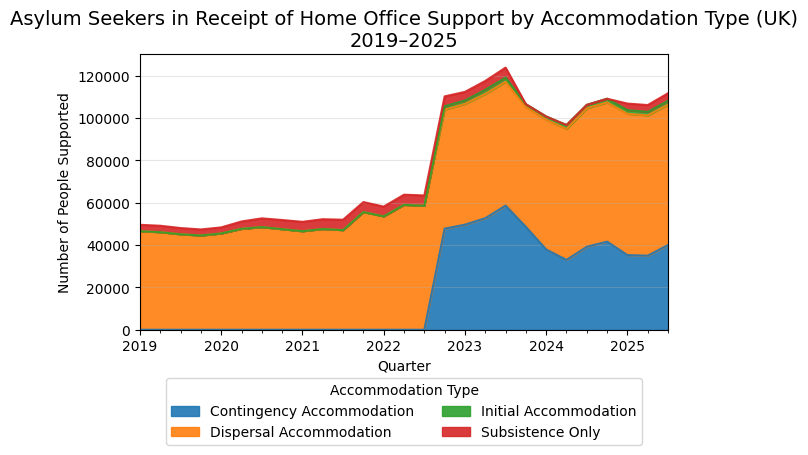

In [ ]:
plt.figure(figsize=(14,8))

pivot.plot.area(stacked=True, alpha=0.9)

plt.title(
    "Asylum Seekers in Receipt of Home Office Support by Accommodation Type (UK)\n2019–2025",
    fontsize=14
)
plt.xlabel("Quarter")
plt.ylabel("Number of People Supported")
plt.legend(
    title="Accommodation Type",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=2
)

plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

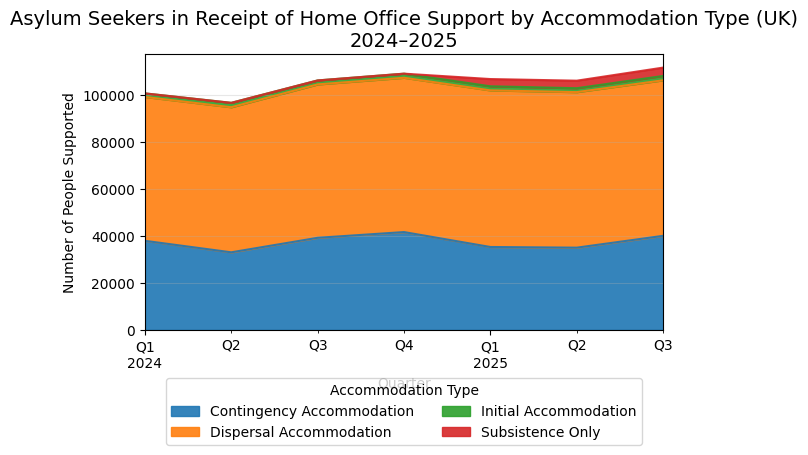

In [ ]:
# Filter to 2024–2025 only
pivot_2425 = pivot.loc["2024-01-01":"2025-12-31"]

plt.figure(figsize=(14,8))
pivot_2425.plot.area(stacked=True, alpha=0.9)

plt.title(
    "Asylum Seekers in Receipt of Home Office Support by Accommodation Type (UK)\n2024–2025",
    fontsize=14
)
plt.xlabel("Quarter")
plt.ylabel("Number of People Supported")
plt.legend(
    title="Accommodation Type",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=2
)
plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

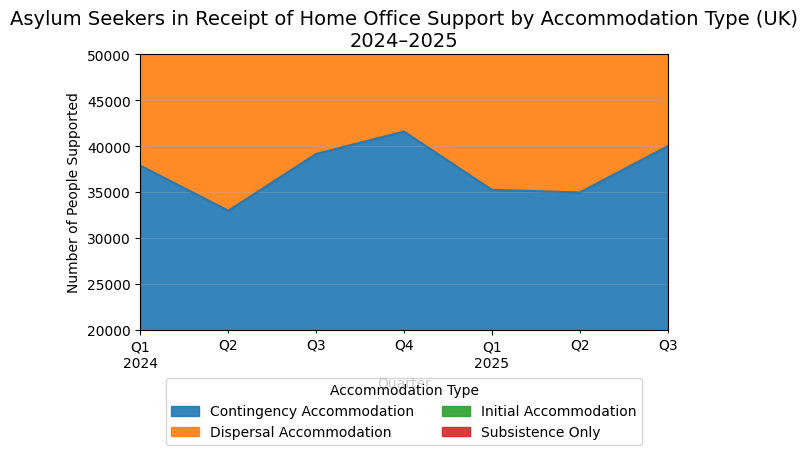

In [ ]:
plt.figure(figsize=(14,8))
pivot_2425.plot.area(stacked=True, alpha=0.9)

plt.title(
    "Asylum Seekers in Receipt of Home Office Support by Accommodation Type (UK)\n2024–2025",
    fontsize=14
)
plt.xlabel("Quarter")
plt.ylabel("Number of People Supported")
plt.legend(
    title="Accommodation Type",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=2
)
plt.grid(axis="y", alpha=0.3)

# Set y-axis limit
plt.ylim(20000, 50000)

plt.tight_layout()
plt.show()

In [ ]:
# Convert counts to proportions (row-wise)
pivot_prop = pivot_2425.div(pivot_2425.sum(axis=1), axis=0) * 100

<Figure size 1400x800 with 0 Axes>

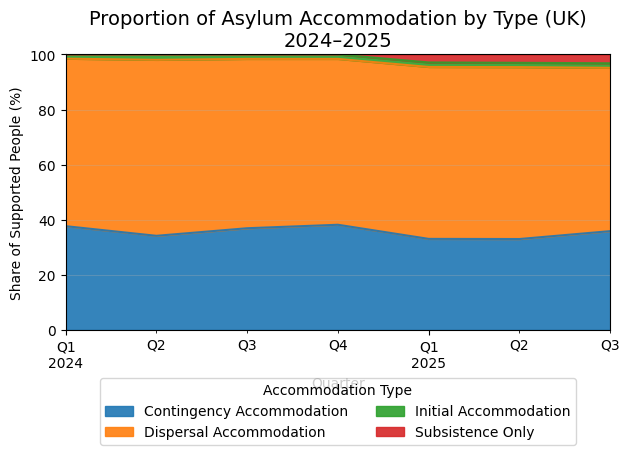

In [ ]:
plt.figure(figsize=(14,8))
pivot_prop.plot.area(stacked=True, alpha=0.9)

plt.title("Proportion of Asylum Accommodation by Type (UK)\n2024–2025", fontsize=14)
plt.xlabel("Quarter")
plt.ylabel("Share of Supported People (%)")
plt.legend(
    title="Accommodation Type",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=2
)
plt.grid(axis="y", alpha=0.3)

plt.ylim(0, 100)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

xls = pd.ExcelFile("/content/Copy support-local-authority-datasets-sep-2025.xlsx")
print("Available Excel sheets:", xls.sheet_names)


pop_df = pd.read_excel(
    "/content/Copy support-local-authority-datasets-sep-2025.xlsx",
    sheet_name="population_per_LA", # Changed to include the trailing space
    header=0,
    engine="openpyxl"
)
pop_df.head()

Available Excel sheets: ['Cover_sheet', 'Contents', 'Notes', 'List_of_Fields', 'Asy_D11', 'Data_Asy_D11', 'Data_Asy_D11_2020_2025', 'population_per_LA', 'population for local authoritie', 'Sheet2']


,lad_code,name,geography,population,Isy
0,E07000223,Adur,Non-metropolitan District,64889,True
1,E07000032,Amber Valley,Non-metropolitan District,130451,True
2,E07000224,Arun,Non-metropolitan District,170064,True
3,E07000170,Ashfield,Non-metropolitan District,129572,True
4,E07000105,Ashford,Non-metropolitan District,140936,True


In [ ]:
pop_df.columns
pop_df["lad_code"].nunique()



314

In [ ]:
df_merged = df.merge(
    pop_df[["lad_code", "population"]],
    on="lad_code",
    how="left"
)

In [ ]:
df_merged.head()

,date,quarter,year_quarter,support_type,region,local_authority,lad_code,accommodation_type,people,accommodation_type_clean,population
0,2014-01-01,Q1,2014Q1,Section 4,N/A - Section 4 (pre-2018),N/A - Section 4 (pre-2018),N/A - Section 4 (pre-2018),Dispersal Accommodation,4854,Dispersal Accommodation,NaN
1,2014-01-01,Q1,2014Q1,Section 95,South East,Milton Keynes,E06000042,Subsistence Only,9,Subsistence Only,305884.0
2,2014-01-01,Q1,2014Q1,Section 95,South East,Mid Sussex,E07000228,Subsistence Only,5,Subsistence Only,161755.0
3,2014-01-01,Q1,2014Q1,Section 95,South East,Medway,E06000035,Subsistence Only,3,Subsistence Only,292655.0
4,2014-01-01,Q1,2014Q1,Section 95,South East,Maidstone,E07000110,Subsistence Only,3,Subsistence Only,187767.0


#Metric 1 — Contingency accommodation per 1,000 residents
This captures local visibility / pressure, which is what protests respond to.

0.5 = 1 person in contingency per 2,000 residents
2.0 = very high local exposure

In [ ]:
contingency_df = df_merged[
    df_merged["accommodation_type_clean"] == "Contingency Accommodation"
].copy()

contingency_df["contingency_per_1000"] = (
    contingency_df["people"] / contingency_df["population"]
) * 1000

contingency_df


,date,quarter,year_quarter,support_type,region,local_authority,lad_code,accommodation_type,people,accommodation_type_clean,population,contingency_per_1000
14698,2022-10-01,Q4,2022Q4,Section 98,East Midlands,Boston,E07000136,Contingency Accommodation - Hotel,95,Contingency Accommodation,71080.0,1.336522
14699,2022-10-01,Q4,2022Q4,Section 98,East Midlands,Charnwood,E07000130,Contingency Accommodation - Hotel,190,Contingency Accommodation,188385.0,1.008573
14700,2022-10-01,Q4,2022Q4,Section 98,East Midlands,Chesterfield,E07000034,Contingency Accommodation - Hotel,84,Contingency Accommodation,106045.0,0.792117
14701,2022-10-01,Q4,2022Q4,Section 98,East Midlands,Derby,E06000015,Contingency Accommodation - Hotel,243,Contingency Accommodation,274149.0,0.886379
14703,2022-10-01,Q4,2022Q4,Section 98,East Midlands,East Lindsey,E07000137,Contingency Accommodation - Hotel,209,Contingency Accommodation,145183.0,1.439562
...,...,...,...,...,...,...,...,...,...,...,...,...
26121,2025-07-01,Q3,2025Q3,Section 95,East of England,Welwyn Hatfield,E07000241,Contingency Accommodation - Hotel,217,Contingency Accommodation,122819.0,1.766828
26124,2025-07-01,Q3,2025Q3,Section 95,East of England,Uttlesford,E07000077,Contingency Accommodation - Hotel,62,Contingency Accommodation,95106.0,0.651904
26128,2025-07-01,Q3,2025Q3,Section 95,East of England,Tendring,E07000076,Contingency Accommodation - Other,43,Contingency Accommodation,156759.0,0.274306
26130,2025-07-01,Q3,2025Q3,Section 95,East of England,Stevenage,E07000243,Contingency Accommodation - Hotel,342,Contingency Accommodation,91774.0,3.726546


#Metric 2 — Change in contingency accommodation (Q1 → Q3 2025)
This captures local shocks, not national trends.

In [ ]:
#keep only 2025 Q1 and Q3
quarters_to_filter = pd.PeriodIndex(["2025Q1", "2025Q3"], freq="Q")
cont_2025 = contingency_df[
    contingency_df["year_quarter"].isin(quarters_to_filter)
]

#pivot to wide format
cont_wide = cont_2025.pivot_table(
    index="lad_code",
    columns="year_quarter",
    values="people",
    aggfunc="sum"
).reset_index()

#compute the change
cont_wide["delta_contingency_Q1_Q3"] = (
    cont_wide[pd.Period('2025Q3', freq='Q')] - cont_wide[pd.Period('2025Q1', freq='Q')]
)

cont_wide

year_quarter,lad_code,2025Q1,2025Q3,delta_contingency_Q1_Q3
0,E06000004,19.0,31.0,12.0
1,E06000006,270.0,NaN,NaN
2,E06000007,193.0,261.0,68.0
3,E06000009,218.0,453.0,235.0
4,E06000010,305.0,257.0,-48.0
...,...,...,...,...
131,S12000038,61.0,66.0,5.0
132,S12000040,79.0,88.0,9.0
133,S12000042,103.0,142.0,39.0
134,S12000048,171.0,197.0,26.0


#Metric 3: share of local asylum population in contingency accomodation

tells us how dominant levels are locally, not nationally.

In [ ]:
#caculate total asylum population per LA-quarter
total_asylum = (
    df
    .groupby(["lad_code", "year_quarter"], as_index=False)
    ["people"]
    .sum()
    .rename(columns={"people": "total_asylum"})
)

total_asylum

,lad_code,year_quarter,total_asylum
0,E06000001,2014Q1,133
1,E06000001,2014Q2,122
2,E06000001,2014Q3,123
3,E06000001,2014Q4,136
4,E06000001,2015Q1,134
...,...,...,...
11827,W06000024,2024Q3,4
11828,W06000024,2024Q4,15
11829,W06000024,2025Q1,11
11830,W06000024,2025Q2,18


In [ ]:
#merge totals into contingency data
contingency_total = contingency_df.merge(
    total_asylum,
    on=["lad_code", "year_quarter"],
    how="left"
)

contingency_total.head()

,date,quarter,year_quarter,support_type,region,local_authority,lad_code,accommodation_type,people,accommodation_type_clean,population,contingency_per_1000,total_asylum
0,2022-10-01,Q4,2022Q4,Section 98,East Midlands,Boston,E07000136,Contingency Accommodation - Hotel,95,Contingency Accommodation,71080.0,1.336522,97
1,2022-10-01,Q4,2022Q4,Section 98,East Midlands,Charnwood,E07000130,Contingency Accommodation - Hotel,190,Contingency Accommodation,188385.0,1.008573,214
2,2022-10-01,Q4,2022Q4,Section 98,East Midlands,Chesterfield,E07000034,Contingency Accommodation - Hotel,84,Contingency Accommodation,106045.0,0.792117,100
3,2022-10-01,Q4,2022Q4,Section 98,East Midlands,Derby,E06000015,Contingency Accommodation - Hotel,243,Contingency Accommodation,274149.0,0.886379,1236
4,2022-10-01,Q4,2022Q4,Section 98,East Midlands,East Lindsey,E07000137,Contingency Accommodation - Hotel,209,Contingency Accommodation,145183.0,1.439562,239


In [ ]:
print(f"Shape of contingency_total: {contingency_total.shape}")
print(f"Number of null values in 'total_asylum' column: {contingency_total['total_asylum'].isnull().sum()}")

Shape of contingency_total: (3819, 14)
Number of null values in 'total_asylum' column: 0


In [ ]:
#compute share
contingency_total["contingency_share"] = (
    contingency_total["people"] / contingency_total["total_asylum"]
)
contingency_total

,date,quarter,year_quarter,support_type,region,local_authority,lad_code,accommodation_type,people,accommodation_type_clean,population,contingency_per_1000,total_asylum,contingency_share
0,2022-10-01,Q4,2022Q4,Section 98,East Midlands,Boston,E07000136,Contingency Accommodation - Hotel,95,Contingency Accommodation,71080.0,1.336522,97,0.979381
1,2022-10-01,Q4,2022Q4,Section 98,East Midlands,Charnwood,E07000130,Contingency Accommodation - Hotel,190,Contingency Accommodation,188385.0,1.008573,214,0.887850
2,2022-10-01,Q4,2022Q4,Section 98,East Midlands,Chesterfield,E07000034,Contingency Accommodation - Hotel,84,Contingency Accommodation,106045.0,0.792117,100,0.840000
3,2022-10-01,Q4,2022Q4,Section 98,East Midlands,Derby,E06000015,Contingency Accommodation - Hotel,243,Contingency Accommodation,274149.0,0.886379,1236,0.196602
4,2022-10-01,Q4,2022Q4,Section 98,East Midlands,East Lindsey,E07000137,Contingency Accommodation - Hotel,209,Contingency Accommodation,145183.0,1.439562,239,0.874477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3814,2025-07-01,Q3,2025Q3,Section 95,East of England,Welwyn Hatfield,E07000241,Contingency Accommodation - Hotel,217,Contingency Accommodation,122819.0,1.766828,246,0.882114
3815,2025-07-01,Q3,2025Q3,Section 95,East of England,Uttlesford,E07000077,Contingency Accommodation - Hotel,62,Contingency Accommodation,95106.0,0.651904,67,0.925373
3816,2025-07-01,Q3,2025Q3,Section 95,East of England,Tendring,E07000076,Contingency Accommodation - Other,43,Contingency Accommodation,156759.0,0.274306,193,0.222798
3817,2025-07-01,Q3,2025Q3,Section 95,East of England,Stevenage,E07000243,Contingency Accommodation - Hotel,342,Contingency Accommodation,91774.0,3.726546,406,0.842365


In [ ]:
#final LA-level exposure table
la_exposure = (
    contingency_total
    .query("year_quarter == @pd.Period('2025Q3', freq='Q')") # Corrected query to use Period object
    [["lad_code", "local_authority", "population", "total_asylum", "contingency_per_1000", "contingency_share"]]
    .merge(
        cont_wide[["lad_code", "delta_contingency_Q1_Q3"]],
        on="lad_code",
        how="left"
    )
)

la_exposure

,lad_code,local_authority,population,total_asylum,contingency_per_1000,contingency_share,delta_contingency_Q1_Q3
0,E09000008,Croydon,409342.0,1270,0.024429,0.007874,83.0
1,E09000007,Camden,216943.0,250,0.009219,0.008000,43.0
2,E09000005,Brent,352976.0,1076,0.121821,0.039963,-49.0
3,E09000003,Barnet,405050.0,1588,0.004938,0.001259,-59.0
4,E09000003,Barnet,405050.0,1588,0.069127,0.017632,-59.0
...,...,...,...,...,...,...,...
343,E07000241,Welwyn Hatfield,122819.0,246,1.766828,0.882114,32.0
344,E07000077,Uttlesford,95106.0,67,0.651904,0.925373,-8.0
345,E07000076,Tendring,156759.0,193,0.274306,0.222798,13.0
346,E07000243,Stevenage,91774.0,406,3.726546,0.842365,25.0
